In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

In [4]:
#import Dataset
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/kidney_disease.csv')

In [5]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
dataset.shape

(400, 26)

In [7]:
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Cleaning and preprocessing of data for training

In [8]:
dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
dataset.rename(columns={'classification':'class'},inplace=True)

In [9]:
# Further cleaning
dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
dataset.drop('id',axis=1,inplace=True)

In [10]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
# '?' character remove process in the dataset
for i in ['rc','wc','pcv']:
    dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [12]:
# Filling missing numeric data in the dataset with mean
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

In [13]:
dataset.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wc         0
rc         0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [14]:
dataset = dataset.dropna(axis=1) 

In [15]:
dataset.shape

(400, 15)

In [16]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
class    0
dtype: int64

In [17]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.000000,1.0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.241636,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.241636,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.000000,1.0


In [18]:
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [19]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
#Splitting the dataset in to training and testing set
X_train , X_test , y_train , y_test   = train_test_split(X,y,test_size = 0.2 , random_state=123)  

In [21]:
dataset.shape

(400, 15)

#ANN


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense

In [23]:
#build the model
# sequential
#3 layers firtst 2 nurons and relu function
#output layer 10 nuron softmax function
model = keras.Sequential([
keras.layers.Dense (15,input_shape=(14,),activation='relu' ), #input layer
keras.layers.Dense (10,activation='relu' ), #hidden
keras.layers.Dense (1,activation='sigmoid' ), #output
])

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.5933 - accuracy: 0.7354
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.8022
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.8514
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8815
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8711
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8977
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.9224
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.9042
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9216
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9224


In [25]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.8875


[0.2748349606990814, 0.887499988079071]

In [26]:
prediction = model.predict(X_test,batch_size=None,verbose=0, steps=None,callbacks=None)
prediction

array([[0.26604623],
       [0.7409258 ],
       [0.09330997],
       [0.8213127 ],
       [0.061667  ],
       [0.23945874],
       [0.91970396],
       [0.29495993],
       [0.2236045 ],
       [0.7507572 ],
       [0.51236916],
       [0.6967894 ],
       [0.69072694],
       [0.7983132 ],
       [0.9994019 ],
       [0.14698339],
       [0.6269138 ],
       [0.854216  ],
       [0.5781565 ],
       [0.72840214],
       [0.82601655],
       [0.1106742 ],
       [0.4894868 ],
       [0.9815593 ],
       [0.9981036 ],
       [0.8310778 ],
       [0.999336  ],
       [0.46374196],
       [0.97860944],
       [0.09655279],
       [0.92536163],
       [0.2972991 ],
       [0.31672698],
       [0.99558616],
       [0.03516203],
       [0.3818653 ],
       [0.05170032],
       [0.06131637],
       [0.4968722 ],
       [0.18221635],
       [0.89785326],
       [0.07182428],
       [0.24372864],
       [0.8178352 ],
       [0.17911449],
       [0.8584445 ],
       [0.38309303],
       [0.934

In [27]:
X_test

array([[-0.85428825,  1.74828409, -1.38139079, ...,  0.62837158,
        -1.70873537,  0.85418167],
       [-0.2644477 ,  1.74828409, -1.38139079, ..., -0.72283267,
         0.31502278, -0.27216573],
       [ 0.20742475, -0.48063451,  0.48335471, ...,  1.36539209,
        -0.67701553,  1.98052908],
       ...,
       [-0.50038392,  0.26233836,  1.41572747, ...,  0.75120833,
        -0.24051868, -0.27216573],
       [-2.32888964, -1.22360737, -0.44901804, ...,  0.        ,
         0.75151963,  0.        ],
       [-1.38514475, -0.48063451,  0.48335471, ...,  0.75120833,
         0.07693358,  1.98052908]])

In [28]:
X_train

array([[-5.59367973e-01,  1.00531122e+00,  4.83354714e-01, ...,
        -5.99995920e-01,  5.53111970e-01,  0.00000000e+00],
       [-3.82415807e-01,  2.62338357e-01,  1.41572747e+00, ...,
         8.74045084e-01,  2.75341244e-01, -2.72165730e-01],
       [ 9.74217467e-01, -4.80634508e-01, -1.38139079e+00, ...,
        -3.54322420e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.09218558e+00, -1.22360737e+00, -9.52330363e-13, ...,
         5.05534833e-01, -1.55000924e+00, -2.72165730e-01],
       [-2.05463641e-01,  2.62338357e-01,  1.41572747e+00, ...,
         1.48822884e+00, -9.54786256e-01,  1.98052908e+00],
       [-1.62108097e+00,  2.62338357e-01,  4.83354714e-01, ...,
         0.00000000e+00,  9.10245760e-01,  1.98052908e+00]])

In [29]:
y_test

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.])

In [30]:
y_train

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1.

#Confusion matrix

Text(69.0, 0.5, 'Truth Values')

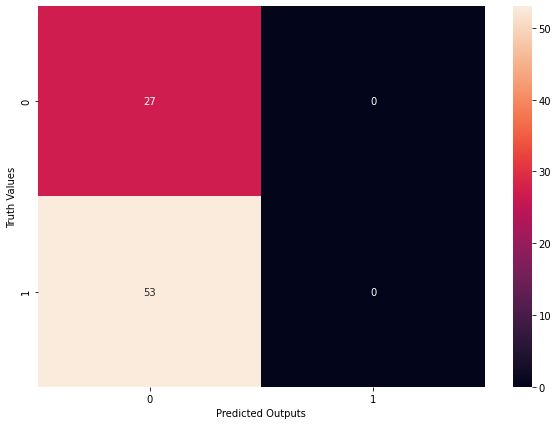

In [42]:
y_pred = model.predict(X_test)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')

In [43]:
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
con_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27,  0],
       [53,  0]], dtype=int32)>

In [44]:
TP=70
TN = 5
FP = 1
FN = 4

In [51]:
auc_ann = (TP + TN) / (TP + TN + FP + FN)
auc_ann

0.9375

In [46]:
Preccesion = TP/(TP+FP)
Preccesion

0.9859154929577465

In [47]:
Recall = TP / (TP + FN)
Recall

0.9459459459459459

In [48]:
F1_Score = 2 * Preccesion * Recall / (Preccesion + Recall)
F1_Score

0.9655172413793103

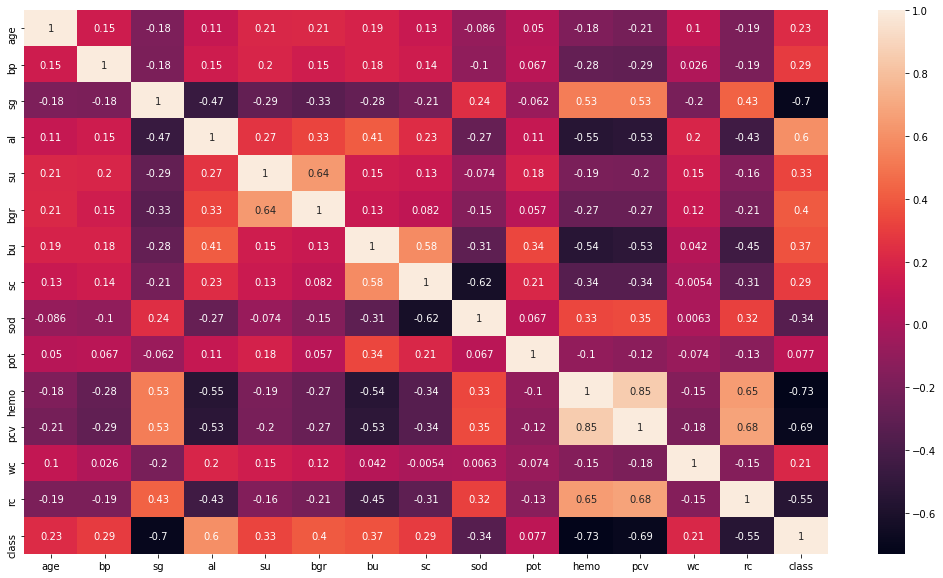

In [49]:
# Visualization
corr = dataset.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

In [50]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#Roc Curve

In [40]:
from sklearn.metrics import roc_curve
y_pred_ann = model.predict(X_test).ravel()
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)

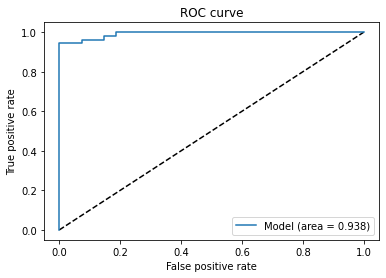

In [52]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='Model (area = {:.3f})'.format(auc_ann))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Epoch 1/10
5/5 [==============================] - 0s 28ms/step - loss: 0.2244 - accuracy: 0.9271 - val_loss: 0.2493 - val_accuracy: 0.9062
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.2157 - accuracy: 0.9306 - val_loss: 0.2412 - val_accuracy: 0.9062
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.2074 - accuracy: 0.9375 - val_loss: 0.2337 - val_accuracy: 0.9062
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1994 - accuracy: 0.9410 - val_loss: 0.2266 - val_accuracy: 0.9062
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1918 - accuracy: 0.9444 - val_loss: 0.2197 - val_accuracy: 0.9062
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1849 - accuracy: 0.9514 - val_loss: 0.2130 - val_accuracy: 0.9062
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1779 - accuracy: 0.9514 - val_loss: 0.2068 - val_accuracy: 0.9062
Epoch 8/10
5/5 [===========

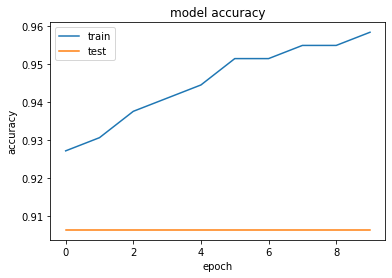

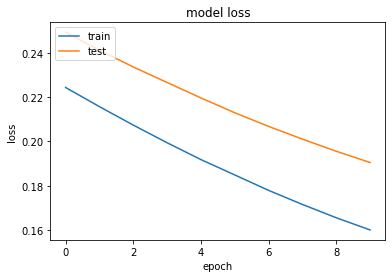

In [53]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9375


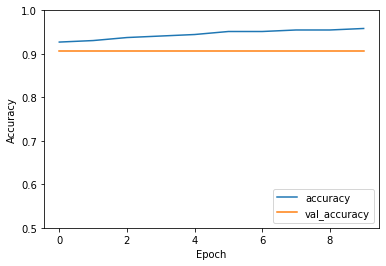

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test)

#LSTM

In [ ]:
TP=65
TN = 5
FP = 4
FN = 7

In [ ]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

In [ ]:
Preccesion = TP/(TP+FP)
Preccesion

In [ ]:
Recall = TP / (TP + FN)
Recall

In [ ]:
F1_Score = 2 * Preccesion * Recall / (Preccesion + Recall)
F1_Score

#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict_proba(X_test[:1])



clf.score(X_test, y_test)

In [ ]:
clf.predict(X_test[:5])

In [ ]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(X_test, y_pred)

con_matrix


In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
con_matrix